![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import sqlite3
import csv
import numpy as np
import seaborn as sns
from matplotlib import style

In [42]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1 = df1.rename(columns = {'title':'movie'})

In [43]:
df2 = pd.read_csv('imdb.name.basics.csv.gz')

In [44]:
df3 = pd.read_csv('imdb.title.akas.csv.gz')
df3 = df3.rename(columns = {'title':'movie'})

In [45]:
df4 = pd.read_csv('imdb.title.basics.csv.gz')
df4 = df4.rename(columns = {'primary_title':'movie'})

In [46]:
df5 = pd.read_csv('imdb.title.crew.csv.gz')

In [47]:
df6 = pd.read_csv('imdb.title.principals.csv.gz')

In [48]:
df7 = pd.read_csv('imdb.title.ratings.csv.gz')

In [49]:
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

In [50]:
df9 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='windows-1254')
con9 = sqlite3.connect('rt.reviews.tsv.gz')
df9 = df9.set_index('id')

In [51]:
df10 = pd.read_csv('tmdb.movies.csv.gz')
con10 = sqlite3.connect('tmdb.movies.csv.gz')
df10 = df10.set_index(['Unnamed: 0'])
df10 = df10.rename(columns = {'title':'movie'})
df10['movie'] = str(df10['movie'])

In [52]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz')
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(np.int64)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(np.int64)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(np.int64)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [53]:
print('DF1:', df1.columns, '\n')
print('DF3: ', df3.columns, '\n')
print('DF4: ', df4.columns, '\n')
print('DF7: ', df7.columns, '\n')
print('DF8: ', df8.columns, '\n')
print('DF9: ', df9.columns, '\n')
print('DF10: ', df10.columns, '\n')
print('DF11: ', df11.columns, '\n')

DF1: Index(['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

DF3:  Index(['title_id', 'ordering', 'movie', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object') 

DF4:  Index(['tconst', 'movie', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object') 

DF7:  Index(['tconst', 'averagerating', 'numvotes'], dtype='object') 

DF8:  Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object') 

DF9:  Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object') 

DF10:  Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'movie', 'vote_average', 'vote_count'],
      dtype='object') 

DF11:  Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
     

In [54]:
production = df11[df11.production_budget < 1000000].index
df11.drop(production, inplace=True)
domestic = df11[df11.domestic_gross < 1].index
df11.drop(domestic, inplace=True)
worldwide = df11[df11.worldwide_gross < 1].index
df11.drop(worldwide, inplace=True)
df11.set_index('movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Sparkler,95,"Mar 19, 1999",1000000,5494,5494
The Helixâ¦Loaded,96,"Mar 18, 2005",1000000,3700,3700
Childless,97,"May 15, 2015",1000000,1036,1036


In [55]:
BigFrame = df11.merge(df1, on='movie').merge(df4, on='movie').drop(columns=['tconst', 'original_title', 'start_year', 'id', 'domestic_gross_y'])

In [56]:
BigFrame = BigFrame.drop_duplicates(subset='movie').set_index('movie')
BigFrame['month'] = BigFrame['release_date'].str[:3]
BigFrame

,release_date,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,runtime_minutes,genres,month
movie,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,BV,804600000,2011,136.0,"Action,Adventure,Fantasy",May
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,BV,946400000,2015,141.0,"Action,Adventure,Sci-Fi",May
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,BV,"1,369.5",2018,149.0,"Action,Adventure,Sci-Fi",Apr
Justice League,"Nov 17, 2017",300000000,229024295,655945209,WB,428900000,2017,120.0,"Action,Adventure,Fantasy",Nov
Spectre,"Nov 6, 2015",300000000,200074175,879620923,Sony,680600000,2015,148.0,"Action,Adventure,Thriller",Nov
...,...,...,...,...,...,...,...,...,...,...
Palo Alto,"May 9, 2014",1000000,767732,1156309,Trib.,NaN,2014,100.0,Drama,May
The Future,"Jul 29, 2011",1000000,568662,1239174,RAtt.,NaN,2011,91.0,"Drama,Fantasy,Romance",Jul
I Origins,"Jul 18, 2014",1000000,336472,852399,FoxS,NaN,2014,106.0,"Drama,Romance,Sci-Fi",Jul


In [57]:
BigFrame = BigFrame.dropna()
BigFrame.dropna(inplace=True)
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace(',', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace('.', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].astype(np.int64)
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].sort_values(ascending=False)
BigFrame.year = BigFrame.year.astype(int)

<ipython-input-57-44699822fc58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigFrame.dropna(inplace=True)
<ipython-input-57-44699822fc58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace(',', '')
<ipython-input-57-44699822fc58>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replac

In [58]:
ForeignF = BigFrame.set_index(keys='foreign_gross')
DomesticF = BigFrame.set_index(keys='domestic_gross_x')
ForeignF['genres'] = ForeignF['genres'].str.split(',')
DomesticF['genres'] = DomesticF['genres'].str.split(',')
ForeignF = ForeignF.drop(columns=['worldwide_gross'], axis=1).drop(columns='domestic_gross_x')
Domestic = DomesticF.drop(columns=['worldwide_gross'], axis=1).drop(columns='foreign_gross')

In [59]:
def getgross(g):
    listi = []
    for k, v in ForeignF['genres'].items():
        if g in v:
            listi.append(k)
    return listi
faction = getgross('Action')
#faction = np.mean(faction)
fcomedy = getgross('Comedy')
#fcomedy = np.mean(fcomedy)
fadventure = getgross('Adventure')
#fadventure = np.mean(fadventure)
fthriller = getgross('Thriller')
#fthriller = np.mean(fthriller)
fcrime = getgross('Crime')
#fcrime = np.mean(fcrime)
fromance = getgross('Romance')
#fromance = np.mean(fromance)
fhorror = getgross('Horror')
#fhorror = np.mean(fhorror)
fscifi = getgross('Sci-Fi')
#fscifi = np.mean(fscifi)
fbiography = getgross('Biography')
#fbiography = np.mean(fbiography)
fmystery = getgross('Mystery')
#fmystery = np.mean(fmystery)
ffamily = getgross('Family')
#ffamily = np.mean(ffamily)
fmusic = getgross('Music')
#fmusic = np.mean(fmusic)
fdocumentary = getgross('Documentary')
#fdocumentary = np.mean(fdocumentary)

mfaction = np.median(faction)
mfcomedy = np.median(fcomedy)
mfadventure = np.median(fadventure)
mfthriller = np.median(fthriller)
mfcrime = np.median(fcrime)
mfromance = np.median(fromance)
mfhorror = np.median(fhorror)
mfscifi = np.median(fscifi)
mfbiography = np.median(fbiography)
mfmystery = np.median(fmystery)
mffamily = np.median(ffamily)
mfmusic = np.median(fmusic)
mfdocumentary = np.median(fdocumentary)

In [60]:
ForGrossMed = [mfcomedy, mfaction, mfadventure, mfthriller, mfcrime, mfromance, mfhorror, mfscifi, mfbiography, mfmystery, mffamily, mfmusic, mfdocumentary]

In [61]:
ForGrossMed = list(ForGrossMed)

In [62]:
def getgross(g):
    listi = []
    for k, v in DomesticF['genres'].items():
        if g in v:
            listi.append(k)
    return listi
daction = getgross('Action')
#daction = np.mean(faction)
dcomedy = getgross('Comedy')
#dcomedy = np.mean(fcomedy)
dadventure = getgross('Adventure')
#dadventure = np.mean(fadventure)
dthriller = getgross('Thriller')
#dthriller = np.mean(fthriller)
dcrime = getgross('Crime')
#dcrime = np.mean(fcrime)
dromance = getgross('Romance')
#dromance = np.mean(fromance)
dhorror = getgross('Horror')
#dhorror = np.mean(fhorror)
dscifi = getgross('Sci-Fi')
#dscifi = np.mean(fscifi)
dbiography = getgross('Biography')
#dbiography = np.mean(fbiography)
dmystery = getgross('Mystery')
#dmystery = np.mean(fmystery)
dfamily = getgross('Family')
#dfamily = np.mean(ffamily)
dmusic = getgross('Music')
#dmusic = np.mean(fmusic)
ddocumentary = getgross('Documentary')
#ddocumentary = np.mean(fdocumentary)

mdaction = np.median(daction)
mdcomedy = np.median(dcomedy)
mdadventure = np.median(dadventure)
mdthriller = np.median(dthriller)
mdcrime = np.median(dcrime)
mdromance = np.median(dromance)
mdhorror = np.median(dhorror)
mdscifi = np.median(dscifi)
mdbiography = np.median(dbiography)
mdmystery = np.median(dmystery)
mdfamily = np.median(dfamily)
mdmusic = np.median(dmusic)
mddocumentary = np.median(ddocumentary)


In [63]:
DomGrossMed = [mdcomedy, mdaction, mdadventure, mdthriller, mdcrime, mdromance, mdhorror, mdscifi, mdbiography, mdmystery, mdfamily, mdmusic, mddocumentary]

In [64]:
DomGrossMed = list(DomGrossMed)

In [65]:
action = 0
for genre in BigFrame['genres']:
    if 'Action' in genre:
        action += 1
adventure = 0
for genre in BigFrame['genres']:
    if 'Adventure' in genre:
        adventure += 1
fantasy = 0
for genre in BigFrame['genres']:
    if 'Fantasy' in genre:
        fantasy += 1
scifi = 0
for genre in BigFrame['genres']:
    if 'Sci' in genre:
        scifi += 1
thriller = 0
for genre in BigFrame['genres']:
    if 'Thriller' in genre:
        thriller += 1
romance = 0
for genre in BigFrame['genres']:
    if 'Romance' in genre:
        romance += 1
comedy = 0
for genre in BigFrame['genres']:
    if 'Comedy' in genre:
        comedy += 1
music = 0
for genre in BigFrame['genres']:
    if 'Music' in genre:
        music += 1
biography = 0
for genre in BigFrame['genres']:
    if 'Biography' in genre:
        biography += 1
horror = 0
for genre in BigFrame['genres']:
    if 'Horror' in genre:
        horror += 1
mystery = 0
for genre in BigFrame['genres']:
    if 'Mystery' in genre:
        mystery += 1
documentary = 0
for genre in BigFrame['genres']:
    if 'Documentary' in genre:
        documentary += 1
crime = 0
for genre in BigFrame['genres']:
    if 'Crime' in genre:
        crime += 1
family = 0
for genre in BigFrame['genres']:
    if 'Family' in genre:
        family += 1
        
        
Genres = [comedy, action, adventure, thriller, crime, romance, horror, scifi, biography, mystery, family, music, documentary]
Genres_i = ['Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Family', 'Music', 'Documentary']
Genres_d = ['Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Family', 'Music', 'Documentary']

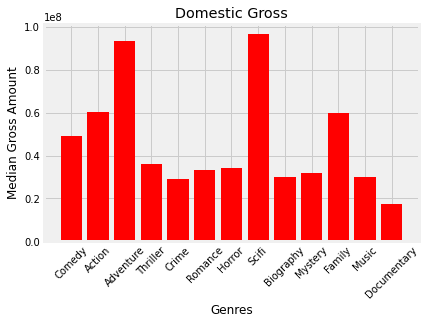

In [66]:

fig, ax = plt.subplots()

ax.bar(x=Genres_i, height=DomGrossMed,  color='Red')
ax.tick_params(axis='x', rotation=45);
ax.set_title('Domestic Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

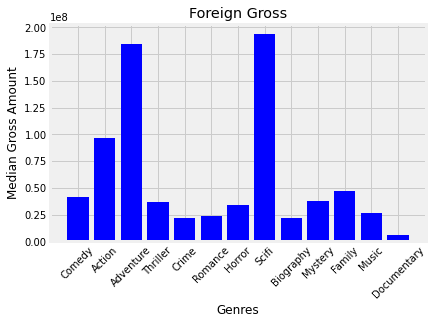

In [67]:
fig, ax = plt.subplots()
ax.bar(x=Genres_d, height=ForGrossMed,  color='Blue')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Foreign Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

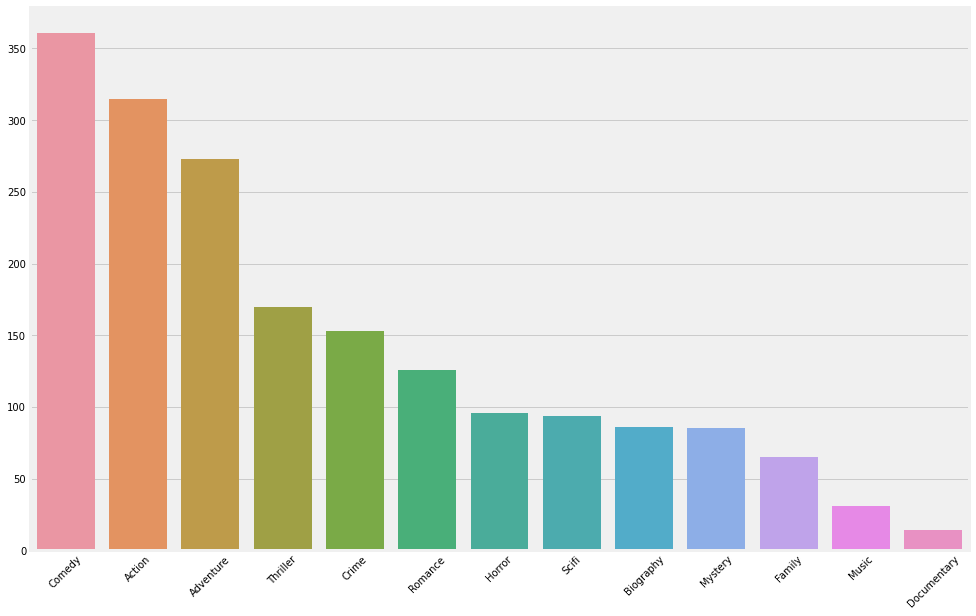

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=Genres_i, y=Genres)
ax.tick_params(axis='x', rotation=45)

In [69]:
df8mask = df8.drop(columns=['director', 'writer', 'studio', 'synopsis', 'id'])
df8mask = df8mask.dropna()
df8mask['box_office'] = df8mask['box_office'].str.replace(',', '').astype(int)
df8mask = df8mask.set_index('box_office')
df8mask = df8mask.sort_index(ascending=False)
genre = df8mask.iloc[:12]['genre'].values
boxoffice = df8mask.iloc[:12]['genre'].index

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

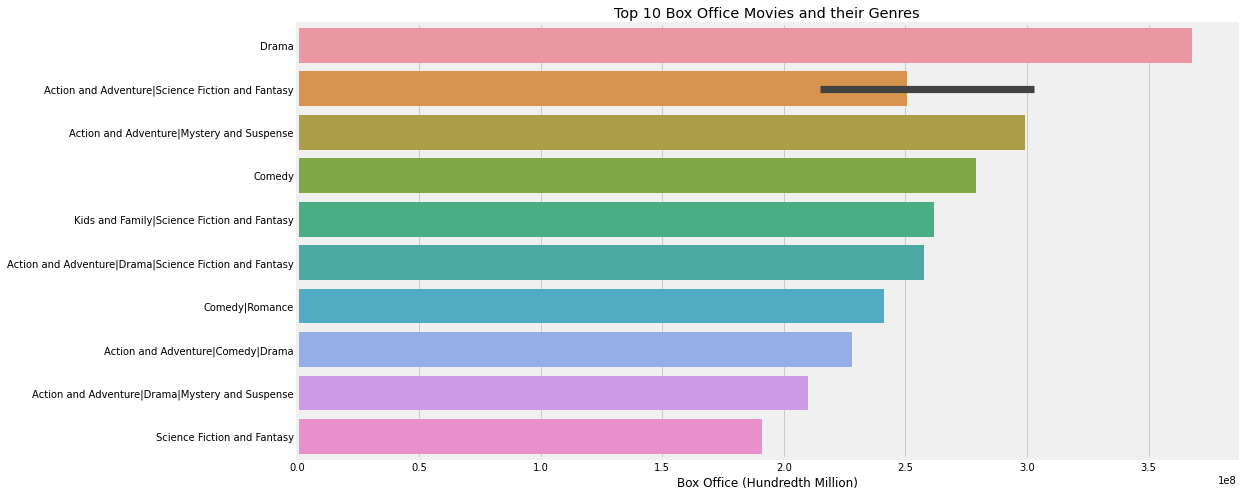

In [70]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=boxoffice, y=genre);
ax.set_title('Top 10 Box Office Movies and their Genres')
ax.set_xlabel('Box Office (Hundredth Million)');

In [71]:
df8mask = df8mask.sort_index(ascending=True)
genre2 = df8mask.iloc[:12]['genre'].values
boxoffice2 = df8mask.iloc[:12]['genre'].index

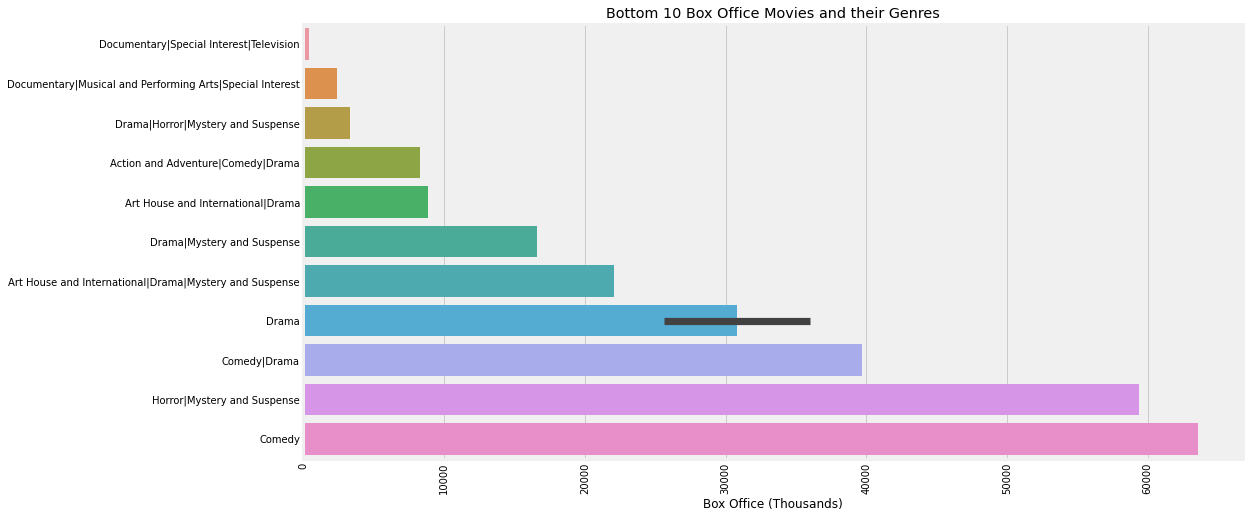

In [72]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=boxoffice2, y=genre2)
ax.tick_params(axis='x', rotation=90);
ax.set_title('Bottom 10 Box Office Movies and their Genres');
ax.set_xlabel('Box Office (Thousands)');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***